In [1]:
import numpy as np
import tensorflow
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
model=Sequential()


In [5]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))

In [6]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=2))


In [7]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [8]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [9]:
model.add(Flatten())


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4

In [11]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [12]:
model.add(Dense(units=3,activation='softmax',kernel_initializer='uniform'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [17]:
train_set = train_datagen.flow_from_directory (
    'C:/Users/Sanjay/Desktop/sql-imarticus/DLPaper1/DL Paper 1/Datasets/CNN/Shoe Classification/train',\
    target_size=(64,64),\
    batch_size=32,\
    class_mode='categorical')

Found 664 images belonging to 3 classes.


In [18]:
train_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [19]:
validation_set = validation_datagen.flow_from_directory (
    'C:/Users/Sanjay/Desktop/sql-imarticus/DLPaper1/DL Paper 1/Datasets/CNN/Shoe Classification/validation_set',\
    target_size=(64, 64),\
    batch_size=32,\
    class_mode='categorical')

Found 114 images belonging to 3 classes.


In [28]:
#train_set= train_set.repeat(3)
model.fit_generator(train_set,
        epochs=10,
        validation_data=validation_set)

Epoch 1/10
21/21 [==============================] - 2s 102ms/step - loss: 0.3455 - accuracy: 0.8464 - val_loss: 0.6308 - val_accuracy: 0.6404
Epoch 2/10
21/21 [==============================] - 2s 89ms/step - loss: 0.3393 - accuracy: 0.8569 - val_loss: 0.4535 - val_accuracy: 0.8596
Epoch 3/10
21/21 [==============================] - 2s 89ms/step - loss: 0.3129 - accuracy: 0.8675 - val_loss: 0.4905 - val_accuracy: 0.7807
Epoch 4/10
21/21 [==============================] - 2s 87ms/step - loss: 0.2642 - accuracy: 0.8976 - val_loss: 0.4403 - val_accuracy: 0.7895
Epoch 5/10
21/21 [==============================] - 2s 87ms/step - loss: 0.2727 - accuracy: 0.8855 - val_loss: 0.2054 - val_accuracy: 0.9561
Epoch 6/10
21/21 [==============================] - 2s 90ms/step - loss: 0.2385 - accuracy: 0.9172 - val_loss: 0.5376 - val_accuracy: 0.7807
Epoch 7/10
21/21 [==============================] - 2s 88ms/step - loss: 0.2229 - accuracy: 0.9096 - val_loss: 0.6443 - val_accuracy: 0.6930
Epoch 8/10
2

In [29]:
import numpy as np

In [30]:
from keras.preprocessing import image

In [31]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [32]:
folder='C:/Users/Sanjay/Desktop/sql-imarticus/DLPaper1/DL Paper 1/Datasets/CNN/Shoe Classification/test'
photos= list()
# enumerate files in the directory
for file in listdir(folder):
    #load image
    photo= load_img(folder+'\\'+file, target_size=(64,64))
    #convert to numpy array
    photo= img_to_array(photo)
    photo = np.expand_dims(photo, axis = 0)
    #store
    photos.append(photo)
print(len(photos))

89


In [33]:
res=[]
for i in photos:
    result = model.predict(i)
    result = np.argmax(result)
    if result == 0:
        print('boots')
        res.append('Boots')
    elif result == 1:
        print('sandals')
        res.append('Sandals')
    else:
        print('slippers')
        res.append('Slippers')  

sandals
boots
boots
slippers
boots
slippers
boots
sandals
sandals
boots
boots
boots
boots
boots
boots
boots
sandals
sandals
sandals
sandals
sandals
sandals
boots
sandals
boots
boots
boots
boots
slippers
slippers
boots
boots
boots
boots
boots
boots
boots
boots
boots
boots
boots
boots
boots
sandals
sandals
sandals
slippers
slippers
sandals
sandals
sandals
sandals
sandals
slippers
slippers
boots
slippers
sandals
slippers
sandals
sandals
sandals
sandals
sandals
boots
slippers
boots
slippers
sandals
slippers
slippers
sandals
sandals
slippers
slippers
slippers
slippers
slippers
sandals
sandals
sandals
sandals
sandals
slippers
sandals
sandals
sandals
slippers
sandals


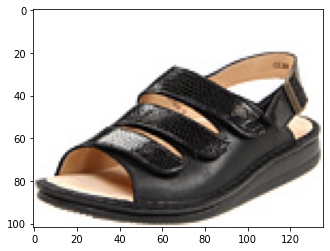

The image is  Sandals


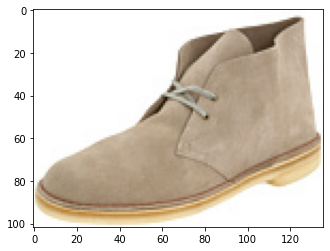

The image is  Boots


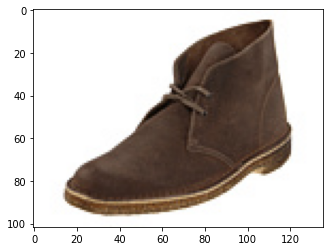

The image is  Boots


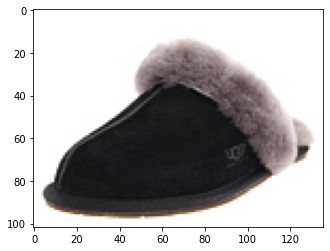

The image is  Slippers


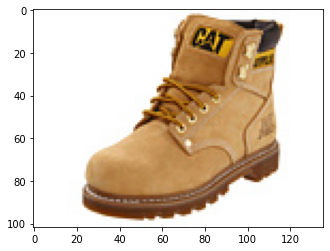

The image is  Boots


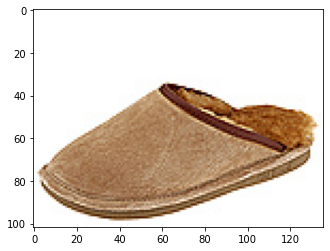

The image is  Slippers


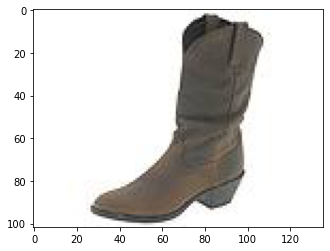

The image is  Boots


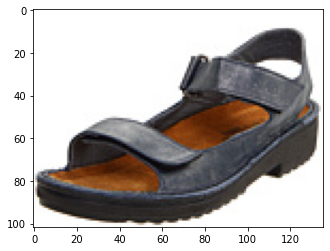

The image is  Sandals


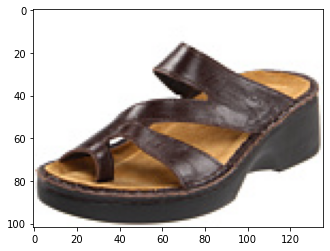

The image is  Sandals


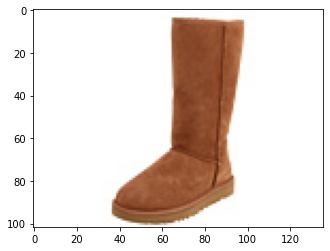

The image is  Boots


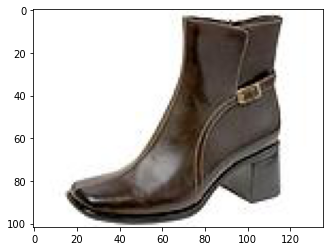

The image is  Boots


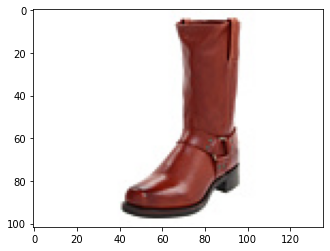

The image is  Boots


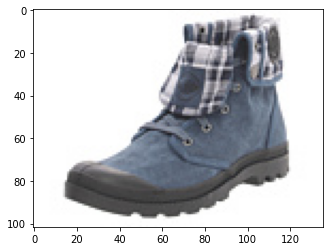

The image is  Boots


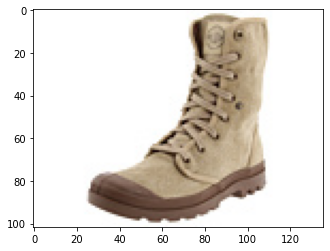

The image is  Boots


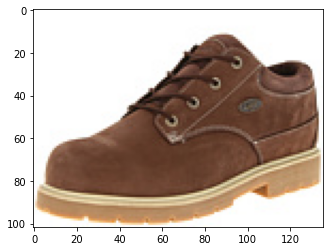

The image is  Boots


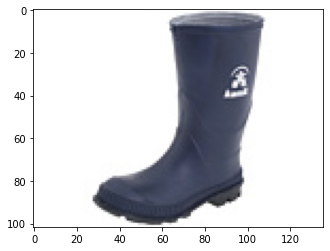

The image is  Boots


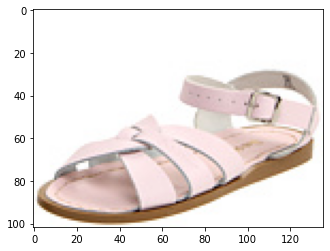

The image is  Sandals


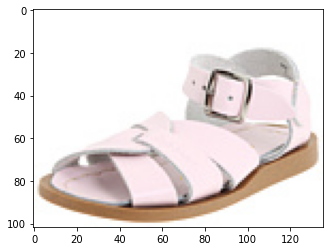

The image is  Sandals


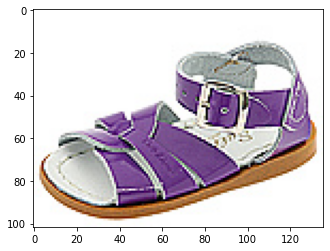

The image is  Sandals


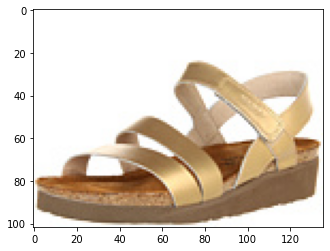

The image is  Sandals


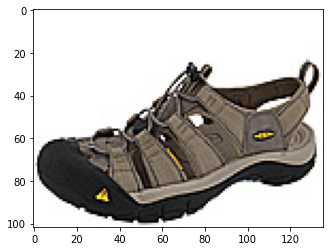

The image is  Sandals


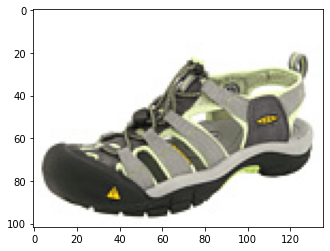

The image is  Sandals


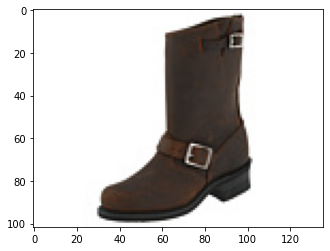

The image is  Boots


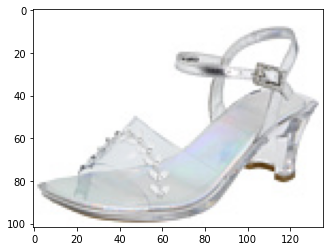

The image is  Sandals


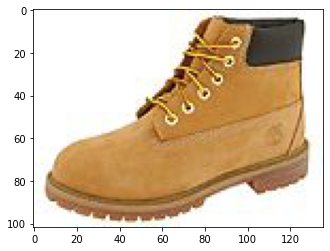

The image is  Boots


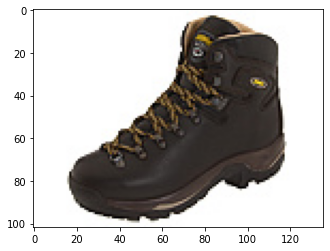

The image is  Boots


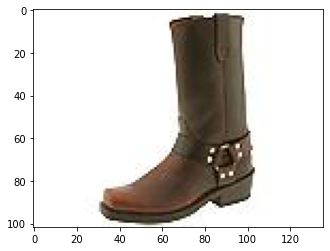

The image is  Boots


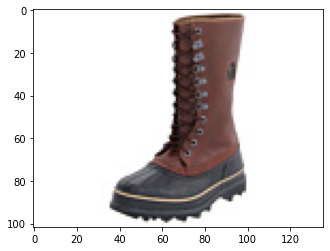

The image is  Boots


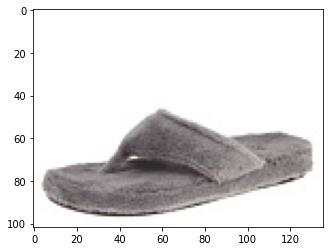

The image is  Slippers


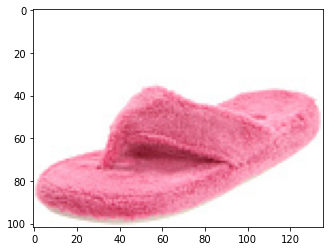

The image is  Slippers


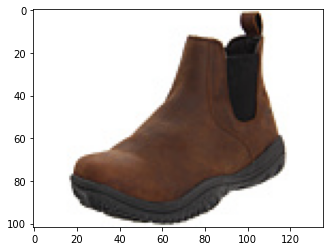

The image is  Boots


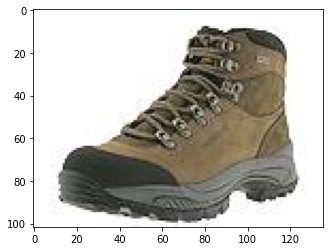

The image is  Boots


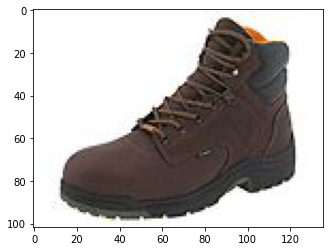

The image is  Boots


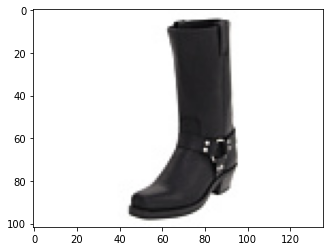

The image is  Boots


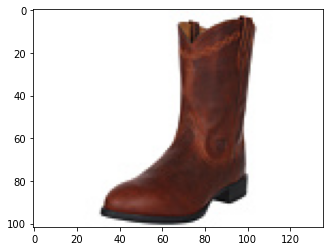

The image is  Boots


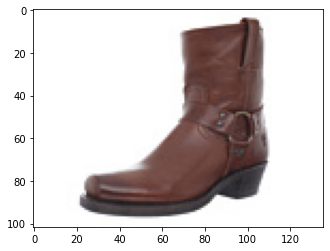

The image is  Boots


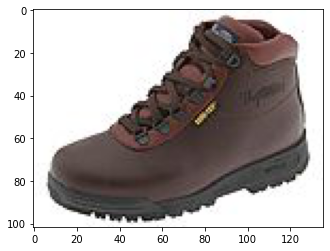

The image is  Boots


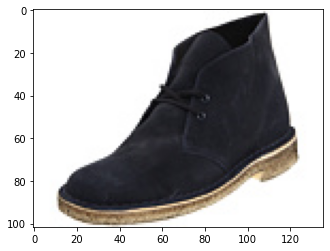

The image is  Boots


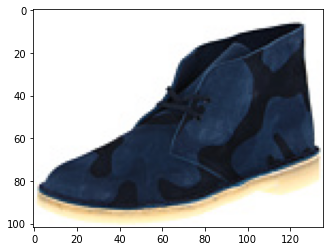

The image is  Boots


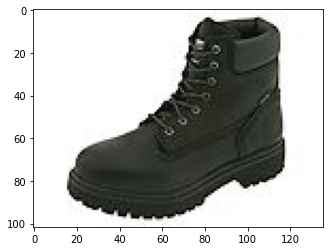

The image is  Boots


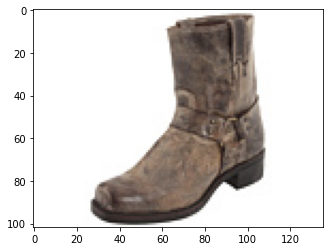

The image is  Boots


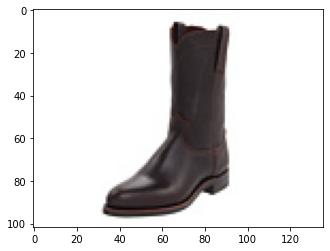

The image is  Boots


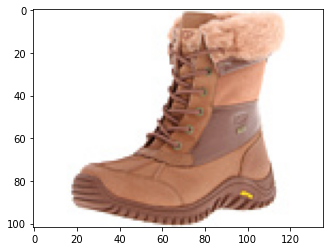

The image is  Boots


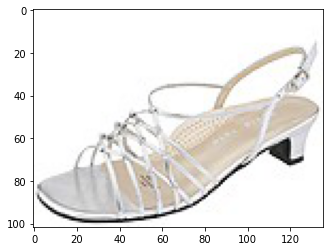

The image is  Sandals


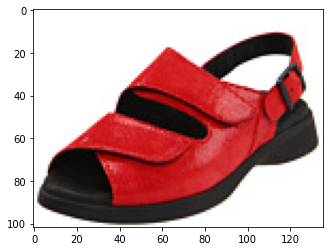

The image is  Sandals


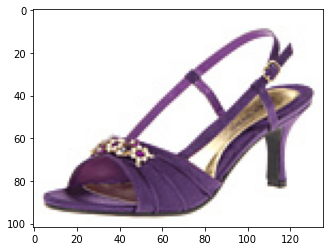

The image is  Sandals


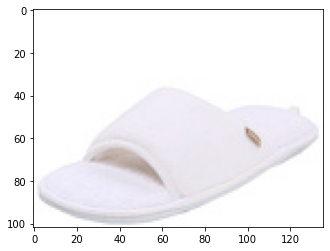

The image is  Slippers


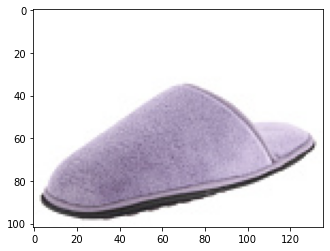

The image is  Slippers


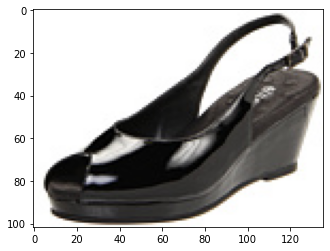

The image is  Sandals


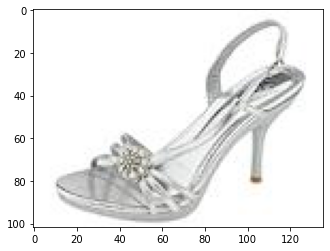

The image is  Sandals


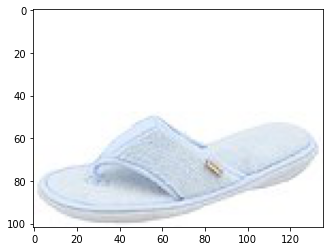

The image is  Sandals


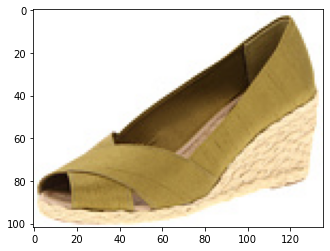

The image is  Sandals


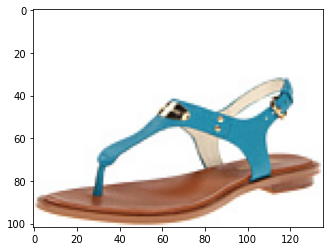

The image is  Sandals


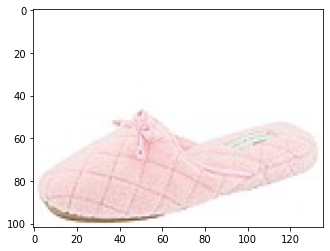

The image is  Slippers


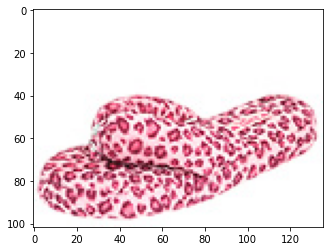

The image is  Slippers


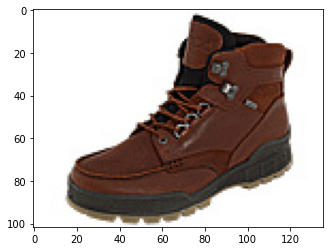

The image is  Boots


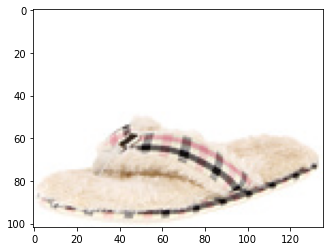

The image is  Slippers


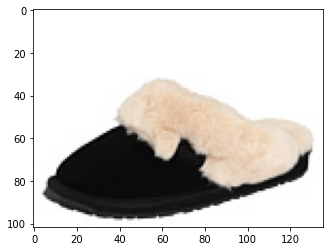

The image is  Sandals


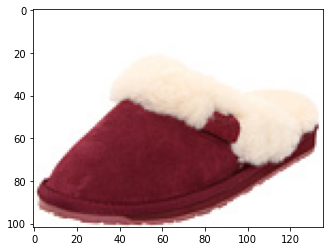

The image is  Slippers


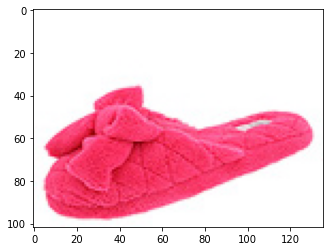

The image is  Sandals


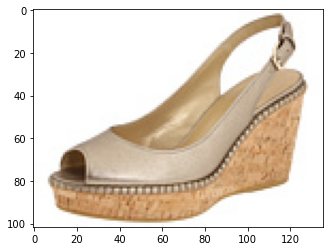

The image is  Sandals


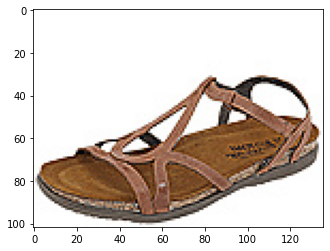

The image is  Sandals


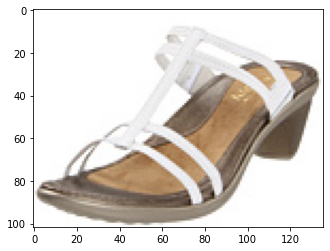

The image is  Sandals


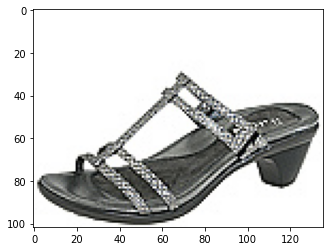

The image is  Sandals


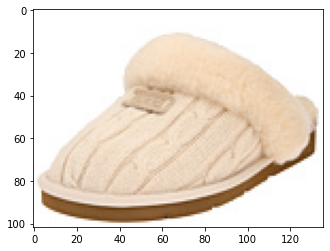

The image is  Boots


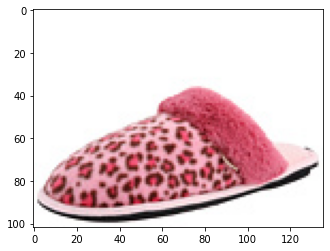

The image is  Slippers


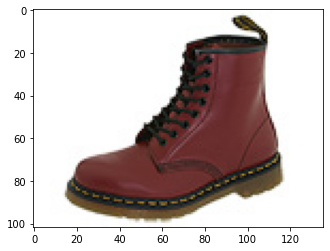

The image is  Boots


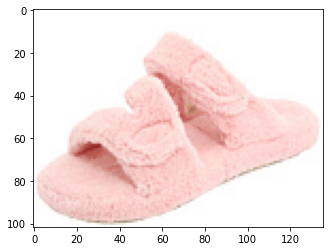

The image is  Slippers


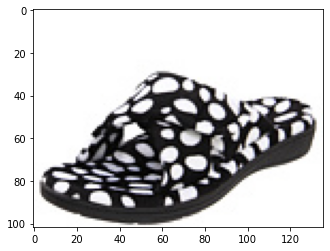

The image is  Sandals


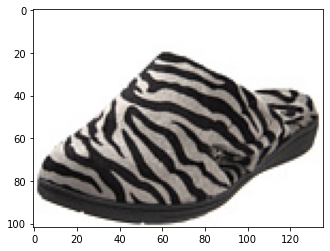

The image is  Slippers


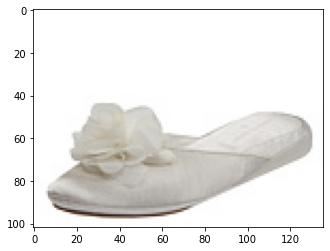

The image is  Slippers


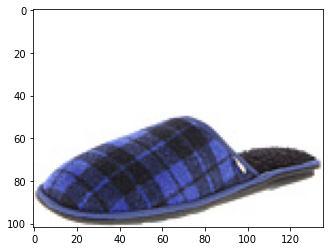

The image is  Sandals


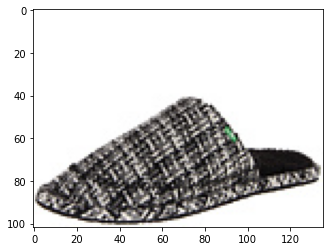

The image is  Sandals


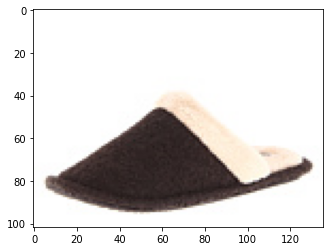

The image is  Slippers


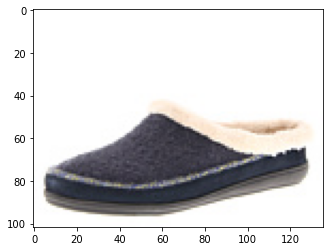

The image is  Slippers


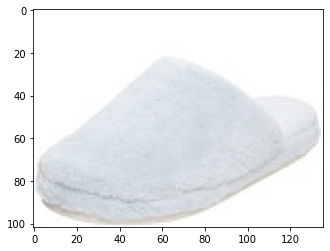

The image is  Slippers


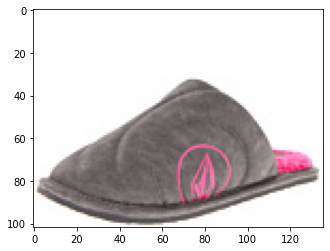

The image is  Slippers


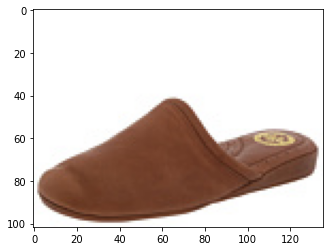

The image is  Slippers


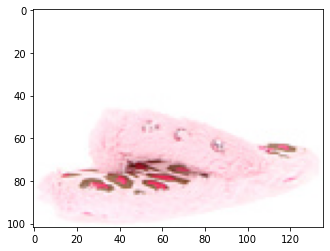

The image is  Sandals


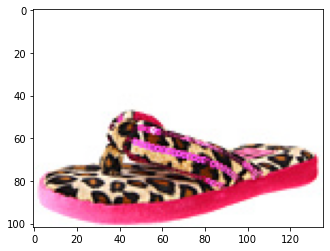

The image is  Sandals


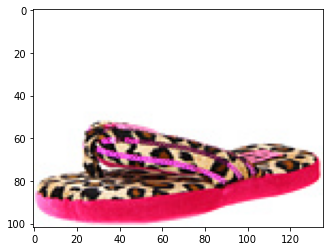

The image is  Sandals


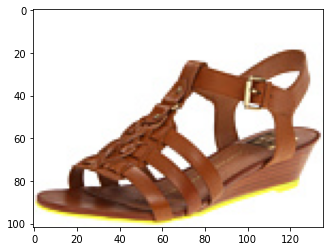

The image is  Sandals


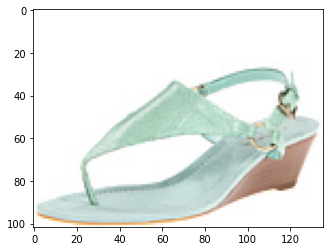

The image is  Sandals


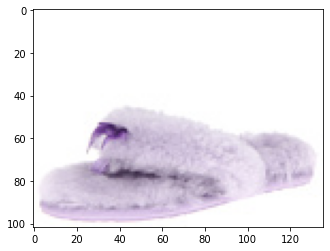

The image is  Slippers


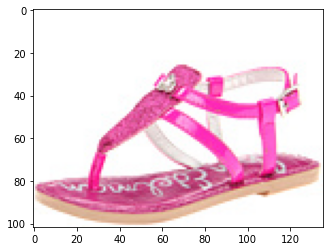

The image is  Sandals


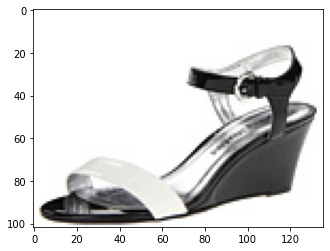

The image is  Sandals


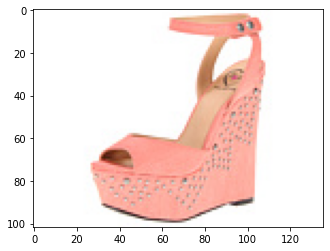

The image is  Sandals


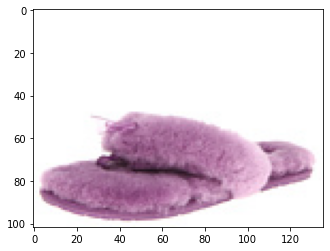

The image is  Slippers


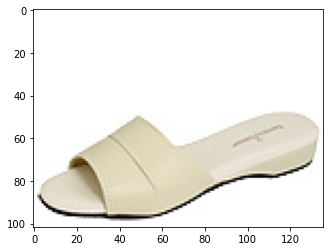

The image is  Sandals


In [34]:
for lable,file in zip(res,listdir(folder)):
    data = keras.preprocessing.image.load_img(folder+'\\'+file)
    plt.imshow(data)
    plt.show()
    print('The image is ',lable)